**IMDB Website Webscraping using Beautifulsoup - Giriraju B, Data Analyst**

In [114]:
!pip install requests
!pip install beautifulsoup4

Importing required libraries

In [115]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

Giving Headers and the website url to scrape

In [116]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5'
}

url = "https://www.imdb.com/chart/top"

Getting requests for web scraping (legal policies)

In [117]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

Creating dummy arrays where we gonna scrape the data & store

In [118]:
Rank = []
movie_names = []
Released_year = []
Duration = []
Rating = []
Rating_type = []
Votes = []

Finding the main class to start web scrape

In [119]:
movies = soup.findAll('div',attrs={'class':'ipc-metadata-list-summary-item__c'})

Webscraping Process

In [120]:
for data in movies:

    parts = data.a.text.split('.', 1)
    movie_rank = parts[0].strip()
    movie_name = parts[1].strip()

    Rank.append(movie_rank)
    movie_names.append(movie_name)

    year = data.find('span', class_= 'sc-1e00898e-8 hsHAHC cli-title-metadata-item').text.replace('(','').replace(')','')
    Released_year.append(year)

    runtime = data.find('span', class_= 'sc-1e00898e-8 hsHAHC cli-title-metadata-item').find_next('span').text
    Duration.append(runtime)

    rating = data.find('span', class_= 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating').text.split()[0]
    Rating.append(rating)

    rating_type = data.find('span', class_= 'sc-1e00898e-8 hsHAHC cli-title-metadata-item').find_next('span').find_next('span').text
    Rating_type.append(rating_type)

    votes = data.find('span', class_= 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating').text.split()[1].replace('(','').replace(')','')
    Votes.append(votes)

Creating Dataframe (as table)

In [121]:
df = pd.DataFrame({
    'Rank': Rank,
    'Movie Name': movie_names,
    'Duration': Duration,
    'Released year': Released_year,
    'Rating': Rating,
    'Rated type': Rating_type,
    'Votes': Votes
})

Converting Duration & Votes columns to single unit for analysing

In [122]:
df['Duration'] = df['Duration'].apply(convert_to_minutes)
df['Votes'] = df['Votes'].apply(convert_viewer_count)

In [123]:
print(df)

    Rank                Movie Name  Duration Released year Rating Rated type  \
0      1  The Shawshank Redemption       142          1994    9.3          R   
1      2             The Godfather       175          1972    9.2          R   
2      3           The Dark Knight       152          2008    9.0      PG-13   
3      4     The Godfather Part II       202          1974    9.0          R   
4      5              12 Angry Men        96          1957    9.0   Approved   
..   ...                       ...       ...           ...    ...        ...   
245  246                  The Help       146          2011    8.1      PG-13   
246  247     It Happened One Night       105          1934    8.1     Passed   
247  248             The 400 Blows        99          1959    8.1  Not Rated   
248  249                  Drishyam       163          2015    8.2  Not Rated   
249  250        Gangs of Wasseypur       321          2012    8.2  Not Rated   

       Votes  
0    2900000  
1    2000

Export the dataset as excel for Analysing in PowerBI

In [124]:
excel_file_path = 'IMDB_TOP_250_movies.xlsx'

df.to_excel(excel_file_path, index=False)

print(f'DataFrame exported to {excel_file_path}')

DataFrame exported to IMDB_TOP_250_movies.xlsx


**---->   Analysis with python**

In [125]:
df.head()

,Rank,Movie Name,Duration,Released year,Rating,Rated type,Votes
0,1,The Shawshank Redemption,142,1994,9.3,R,2900000
1,2,The Godfather,175,1972,9.2,R,2000000
2,3,The Dark Knight,152,2008,9.0,PG-13,2800000
3,4,The Godfather Part II,202,1974,9.0,R,1300000
4,5,12 Angry Men,96,1957,9.0,Approved,851000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           250 non-null    object
 1   Movie Name     250 non-null    object
 2   Duration       250 non-null    int64 
 3   Released year  250 non-null    object
 4   Rating         250 non-null    object
 5   Rated type     250 non-null    object
 6   Votes          250 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.8+ KB


There is no blank row or cell, we are good to go !!

In [156]:
Total_movies = df['Movie Name'].count()
print("Total movies in the dataset are",Total_movies )

Total movies in the dataset are 250


In [158]:
Rating_count = df['Rating'].nunique()
print("Total ratings in the dataset are",Rating_count )

Total movies in the dataset are 13


In [160]:
Rating_type = df['Rated type'].nunique()
print("Total ratings type in the dataset are",Rating_type)

Total ratings type in the dataset are 15


**Immporting visualisation libraries**

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Top 10 Highest Rated Movies

<ipython-input-128-a6d32e1e1f3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Rating', y='Movie Name', data=top_10_movies, palette='Blues_r')


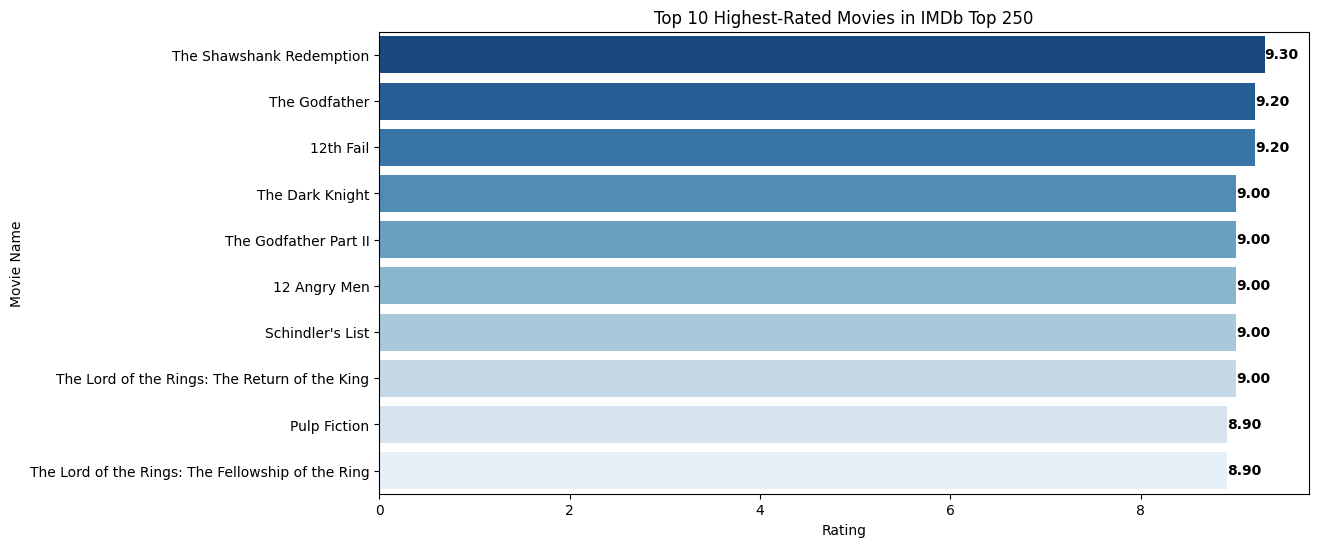

In [128]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

top_10_movies = df.nlargest(10, 'Rating')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Rating', y='Movie Name', data=top_10_movies, palette='Blues_r')

for index, value in enumerate(top_10_movies['Rating']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontweight='bold')

plt.title('Top 10 Highest-Rated Movies in IMDb Top 250')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

2. Number of movies over the years

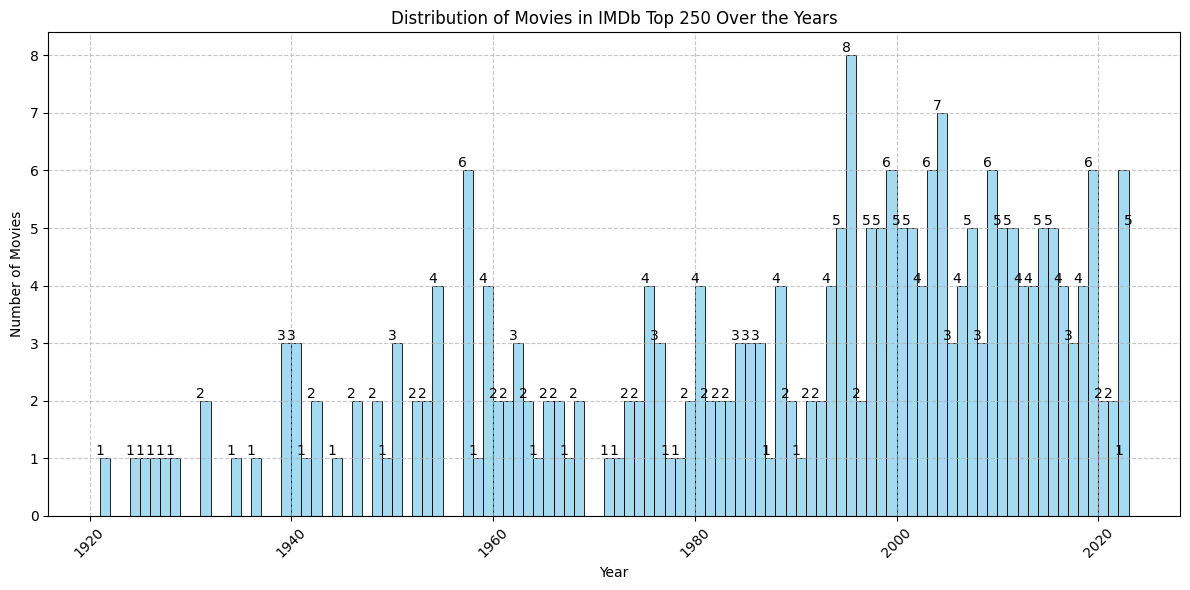

In [129]:
df['Released year'] = pd.to_numeric(df['Released year'], errors='coerce')

movies_per_year = df.groupby('Released year').size().reset_index(name='Number of Movies')

plt.figure(figsize=(12, 6))
sns.histplot(x='Released year', data=df, bins=range(int(df['Released year'].min()), int(df['Released year'].max()) + 1), color='skyblue', edgecolor='black')

for index, value in movies_per_year.iterrows():
    plt.text(value['Released year'], value['Number of Movies'], str(value['Number of Movies']), ha='center', va='bottom')

plt.title('Distribution of Movies in IMDb Top 250 Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Distribution of movie ratings

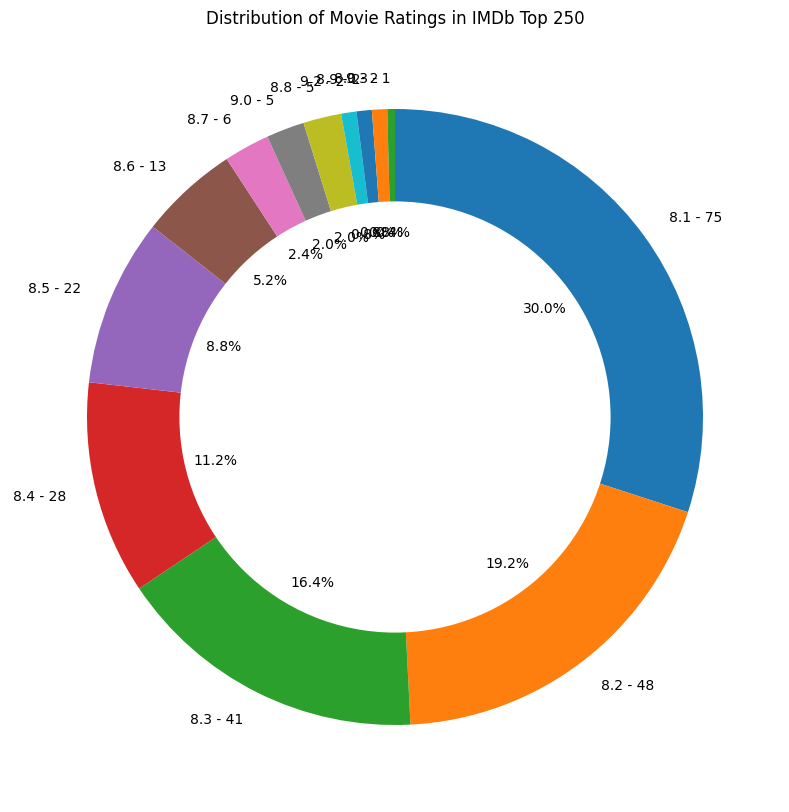

In [137]:
plt.figure(figsize=(15, 10))
labels = ['{} - {}'.format(round(val, 1), count) for val, count in zip(df['Rating'].value_counts().index, df['Rating'].value_counts())]
plt.pie(df['Rating'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), counterclock=False)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Movie Ratings in IMDb Top 250')
plt.show()

4. Distribution of Movie Duration in IMDB Top 250

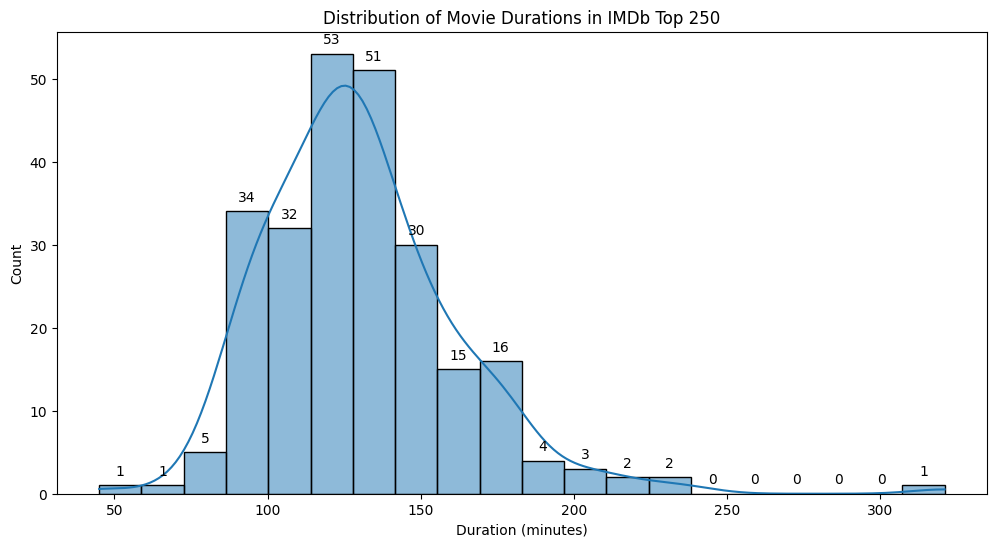

In [138]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['Duration'], bins=20, kde=True)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

plt.title('Distribution of Movie Durations in IMDb Top 250')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

5. Distribution of Rated Types in IMDb Top 250

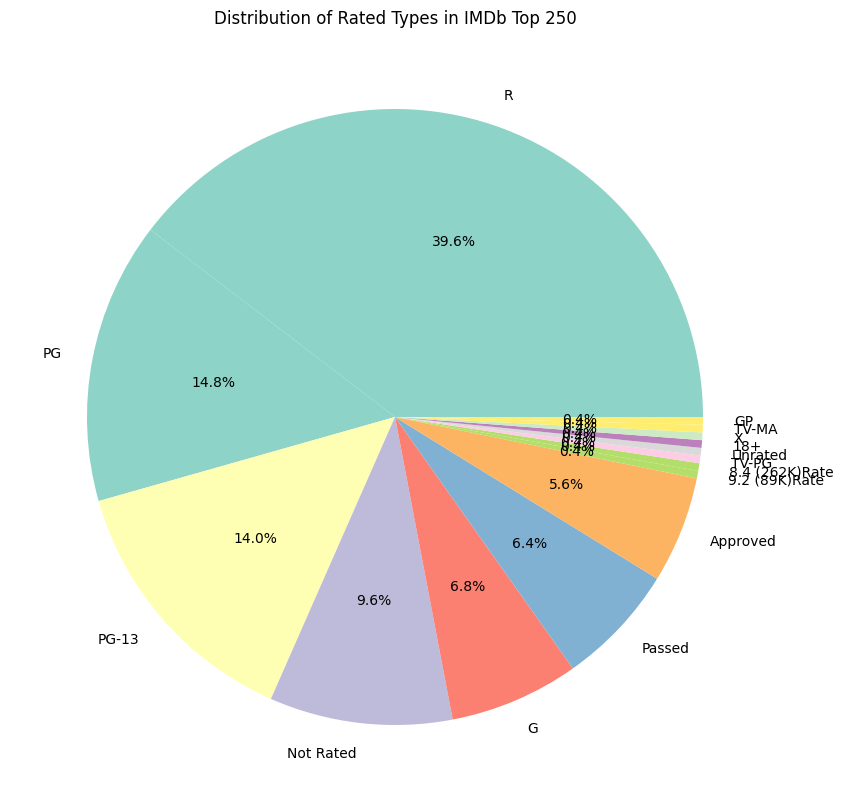

In [139]:
plt.figure(figsize=(12, 10))
df['Rated type'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3')
plt.title('Distribution of Rated Types in IMDb Top 250')
plt.ylabel('')
plt.show()

6. Correlations between movie duration and Ratings

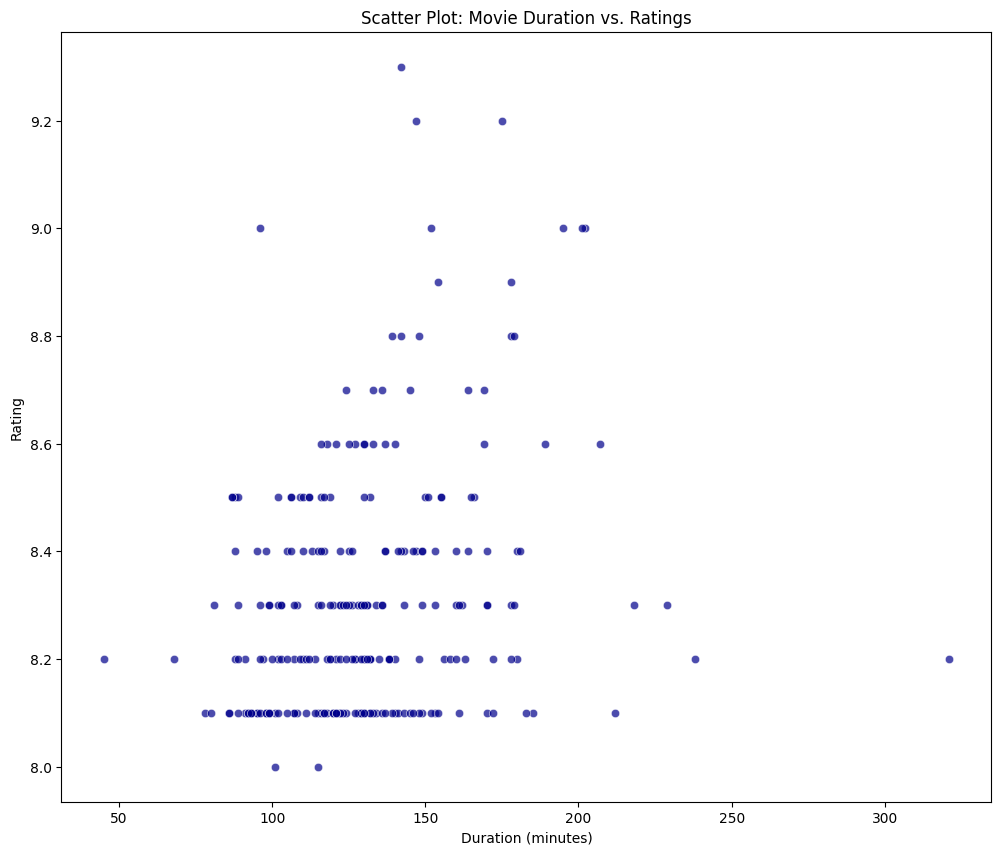

In [140]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Duration', y='Rating', data=df, color='darkblue', alpha=0.7)
plt.title('Scatter Plot: Movie Duration vs. Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

7. Distribution of Votes for Movies

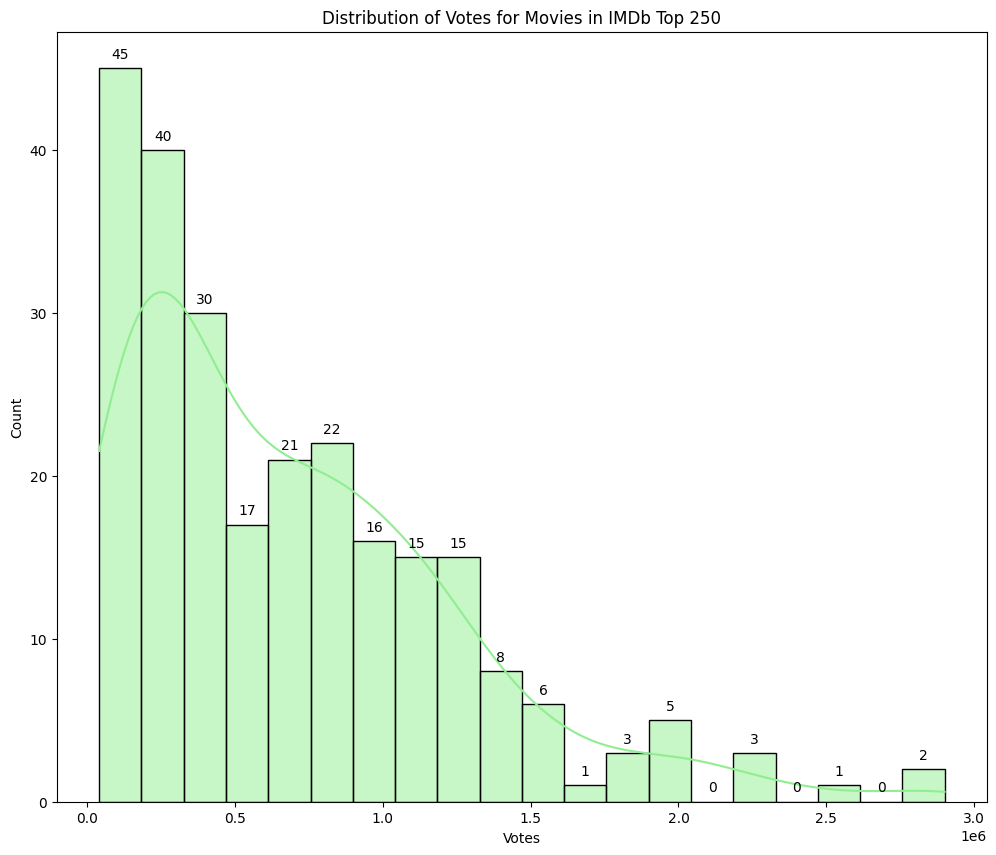

In [141]:
plt.figure(figsize=(12, 10))
ax = sns.histplot(df['Votes'], bins=20, color='lightgreen', kde=True)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

plt.title('Distribution of Votes for Movies in IMDb Top 250')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.show()

8. Average Duration of Movies for Each Rating Type

<ipython-input-145-23fedd01a4eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values, palette='viridis')


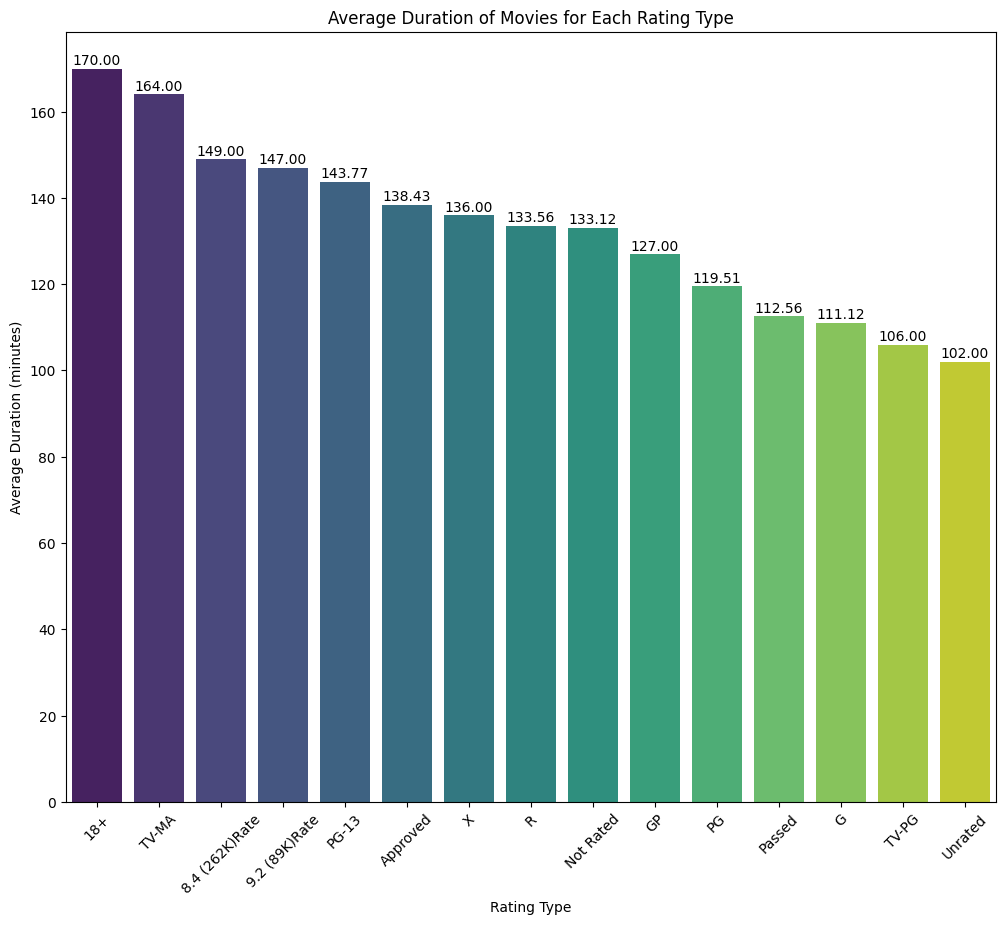

In [145]:
avg_duration_by_rating = df.groupby('Rated type')['Duration'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
ax = sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values, palette='viridis')

for i, v in enumerate(avg_duration_by_rating.values):
    ax.text(i, v + 0.2, f'{v:.2f}', ha='center', va='bottom')

plt.title('Average Duration of Movies for Each Rating Type')
plt.xlabel('Rating Type')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

9. Average Rating Across Different Years of Movie Releases

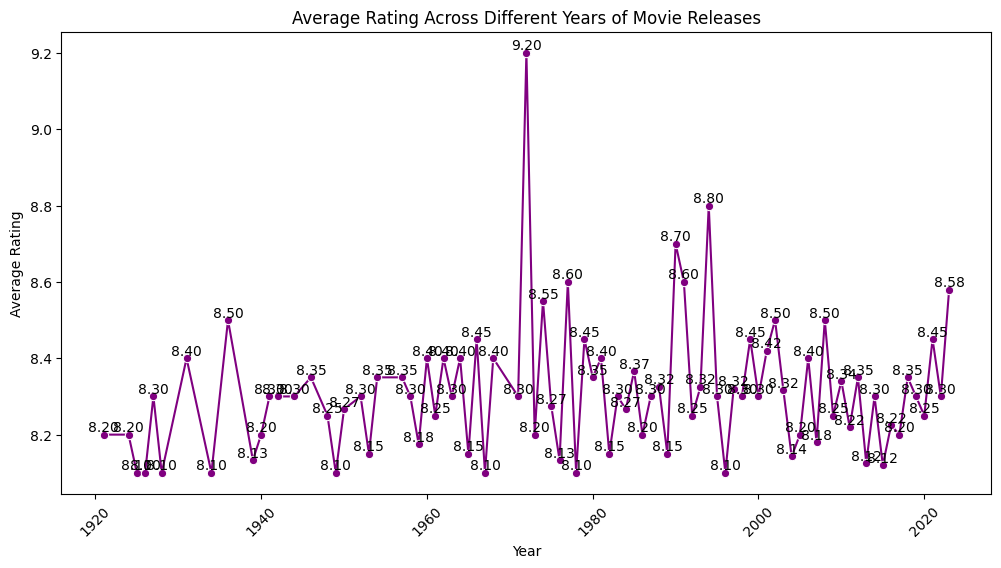

In [148]:
df['Released year'] = pd.to_numeric(df['Released year'], errors='coerce')
avg_rating_by_year = df.groupby('Released year')['Rating'].mean()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values, marker='o', color='purple')

for x, y in zip(avg_rating_by_year.index, avg_rating_by_year.values):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.title('Average Rating Across Different Years of Movie Releases')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

10. Bottom 10 Lowest Rated Movies

<ipython-input-161-8d703d55fd1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Rating', y='Movie Name', data=bottom_10_movies, palette='Reds_r')


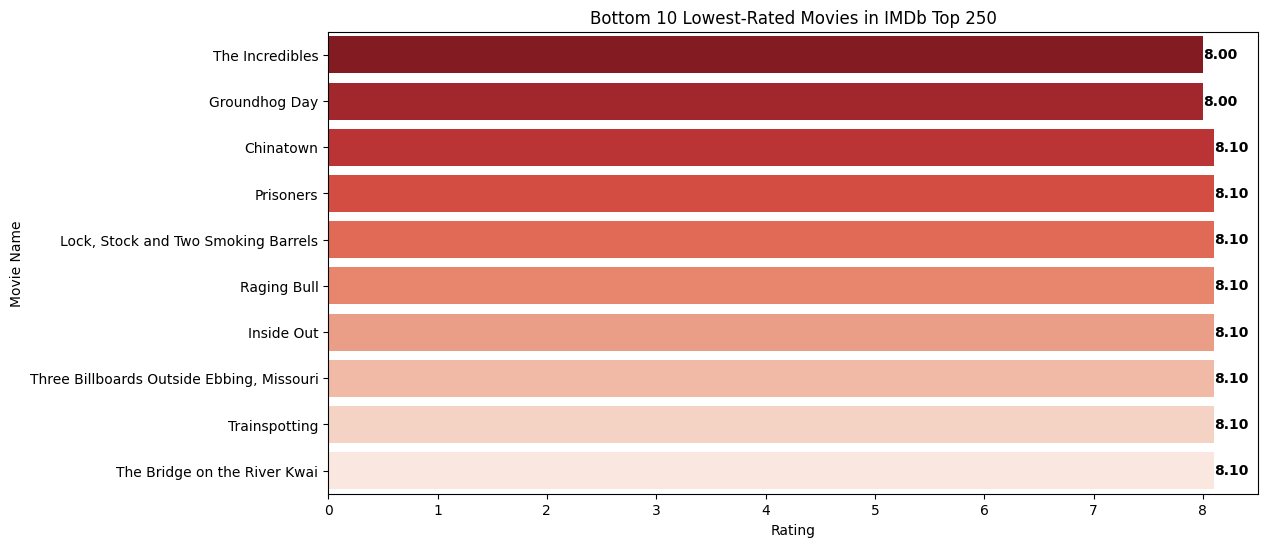

In [161]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

bottom_10_movies = df.nsmallest(10, 'Rating')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Rating', y='Movie Name', data=bottom_10_movies, palette='Reds_r')

for index, value in enumerate(bottom_10_movies['Rating']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontweight='bold')

plt.title('Bottom 10 Lowest-Rated Movies in IMDb Top 250')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

                                                    Thank You !!